# **1.Data Collection**- Healthcare Dataset was collected from 
https://www.kaggle.com/kumarajarshi/life-expectancy-who/code
# Domain: Health Care   and      Topic: Life Expectancy (WHO)

**Description of the dataset**
The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single dataset. On initial visual inspection of the data showed some missing values. As the datasets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo,Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model dataset. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.
**Context**
Although there have been lot of studies undertaken in the past on factors affecting life expectancy considering demographic variables, income composition and mortality rates. It was found that affect of immunization and human development index was not taken into account in the past. Also, some of the past research was done considering multiple linear regression based on data set of one year for all the countries. Hence, this gives motivation to resolve both the factors stated previously by formulating a regression model based on mixed effects model and multiple linear regression while considering data from a period of 2000 to 2015 for all the countries. Important immunization like Hepatitis B, Polio and Diphtheria will also be considered. In a nutshell, this study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well. Since the observations this dataset are based on different countries, it will be easier for a country to determine the predicting factor which is contributing to lower value of life expectancy. This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population.

**Content**
The project relies on accuracy of data. The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The data-sets are made available to public for the purpose of health data analysis. The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single data-set. On initial visual inspection of the data showed some missing values. As the data-sets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo, Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model data-set. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.

**Acknowledgements**
The data was collected from WHO and United Nations website with the help of Deeksha Russell and Duan Wang.
Inspiration

**The data-set aims to answer the following key questions:**
> Does various predicting factors which has been chosen initially really affect the Life expectancy? 

> What are the predicting variables actually affecting the life expectancy?


> Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?


> How does Infant and Adult mortality rates affect life expectancy?


> Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.


> What is the impact of schooling on the lifespan of humans?


> Does Life Expectancy have positive or negative relationship with drinking alcohol?


> Do densely populated countries tend to have lower life expectancy?


>  What is the impact of Immunization coverage on life Expectancy?

**Load the Healthcare dataset**

In [1]:
# import all libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import percentile
from scipy import stats
import scipy.stats as scp

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load the dataset into python environment**


In [3]:
#Load the Life Expectancy data csv files into pandas dataframe
#Salesdata=pd.read_csv('/content/drive/My Drive/Colab Notebooks/.csv')
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Life Expectancy Data.csv')

Check the basic details of the dataset

In [4]:
df


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


This will display the contents of the dataset

In [5]:
df.shape

(2938, 22)

This gives an idea about the number of rows and columns. The dataset contains 2938 rows and 22 columns

In [6]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

The dataset contains healthcare details with the following features viz.,Country,Year,Status,Life expectancy , Adult Mortality,
       infant deaths, Alcohol, percentage expenditure, Hepatitis B,
       Measles ,  BMI , under-five deaths , Polio, Total expenditure,
       Diphtheria , HIV/AIDS, GDP, Population,
        thinness  1-19 years,  thinness 5-9 years,
       Income composition of resources and Schooling.Also, there are some missing values in the dataset. 

In [7]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


This will give a statistical summary of count, mean, standard deviation, minimum value of each column also maximum, 25%, 50% and 75% percentile for the dataset

#**2. Preprocessing**

In [8]:
# checking the datatypes of all features in the dataset
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [9]:
df.isna().sum() # This will find out the null values present in each column of the dataset

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

It is clear that null values are present in the dataset. 

In [10]:
# Display the data before treating missing values
df[df.isna().any(axis=1)] # check at least one null values in a row 

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,59.5,24,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
44,Algeria,2003,Developing,71.7,146.0,20,0.34,25.018523,NaN,15374,47.0,23,87.0,3.60,87.0,0.1,294.335560,3243514.0,6.3,6.1,0.663,11.5
45,Algeria,2002,Developing,71.6,145.0,20,0.36,148.511984,NaN,5862,46.1,23,86.0,3.73,86.0,0.1,1774.336730,3199546.0,6.3,6.2,0.653,11.1
46,Algeria,2001,Developing,71.4,145.0,20,0.23,147.986071,NaN,2686,45.3,24,89.0,3.84,89.0,0.1,1732.857979,31592153.0,6.4,6.3,0.644,10.9
47,Algeria,2000,Developing,71.3,145.0,21,0.25,154.455944,NaN,0,44.4,25,86.0,3.49,86.0,0.1,1757.177970,3118366.0,6.5,6.4,0.636,10.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2918,Zambia,2003,Developing,46.4,64.0,39,2.33,65.789974,NaN,881,17.6,62,85.0,8.18,83.0,18.2,429.158343,11421984.0,7.3,7.2,0.443,10.2
2919,Zambia,2002,Developing,45.5,69.0,41,2.44,54.043480,NaN,25036,17.3,66,85.0,6.93,84.0,18.4,377.135244,111249.0,7.4,7.3,0.433,10.0
2920,Zambia,2001,Developing,44.6,611.0,43,2.61,46.830275,NaN,16997,17.1,70,86.0,6.56,85.0,18.6,378.273624,1824125.0,7.4,7.4,0.424,9.8
2921,Zambia,2000,Developing,43.8,614.0,44,2.62,45.616880,NaN,30930,16.8,72,85.0,7.16,85.0,18.7,341.955625,1531221.0,7.5,7.5,0.418,9.6


**Treating null values**

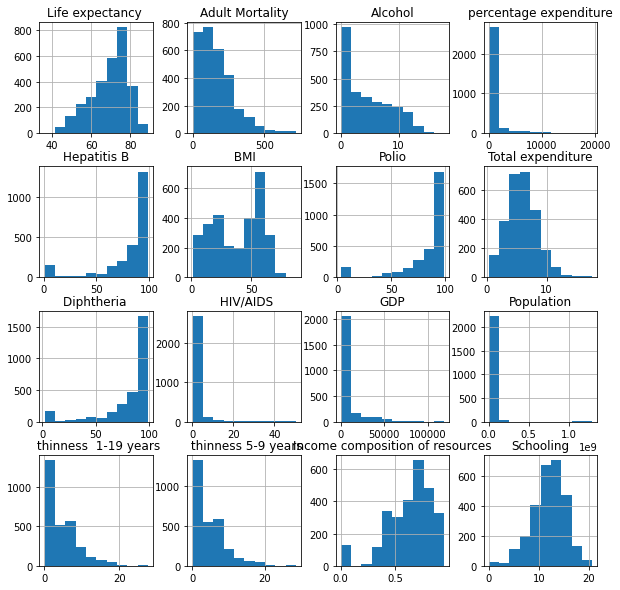

In [11]:
# plotting the frequency graph
freqgraph = df.select_dtypes(include='float')
freqgraph.hist(figsize=(10,10))
plt.show()

We can see that all the float type features are almost right skewed and now we can fill the missing values  with the median of each of the columns and all others are filled with mean

In [12]:
df.columns   # Dispaly the columns in the dataset

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [13]:
for i in ['Life expectancy ','Total expenditure','Income composition of resources','Schooling',' BMI ']:
     df[i]=df[i].fillna(df[i].mean())

In [14]:
for i in ['Adult Mortality', 'Alcohol','Hepatitis B','Polio','Diphtheria ','GDP','Population',
          ' thinness  1-19 years', ' thinness 5-9 years']:                            
    df[i]=df[i].fillna(df[i].median())

In [15]:
df.isna().sum()    # Observing null values after treatment

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [16]:
# Display the data after treating missing values
df[df.isna().any(axis=1)] 

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling


It is clear that all the null values have been treated now.

 **Handling Outliers**

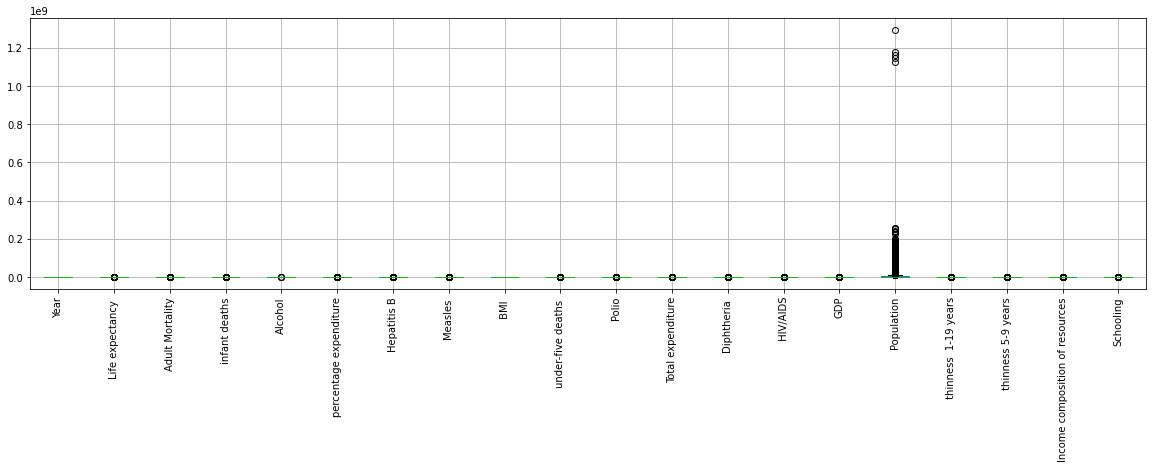

In [17]:
plt.figure(figsize = (20,5))  # Observing boxplot of all features before handling outliers
df.boxplot()
plt.xticks(rotation = 90)
plt.show()

The boxplot shows no outliers for the features 'Year' and 'BMI'.

Maximum outliers are in the feature 'population'

In [18]:
df1 = df.copy(deep =True)

In [20]:
df_1 = df.drop(['Population'], axis=1)     #dropping the feature 'population'

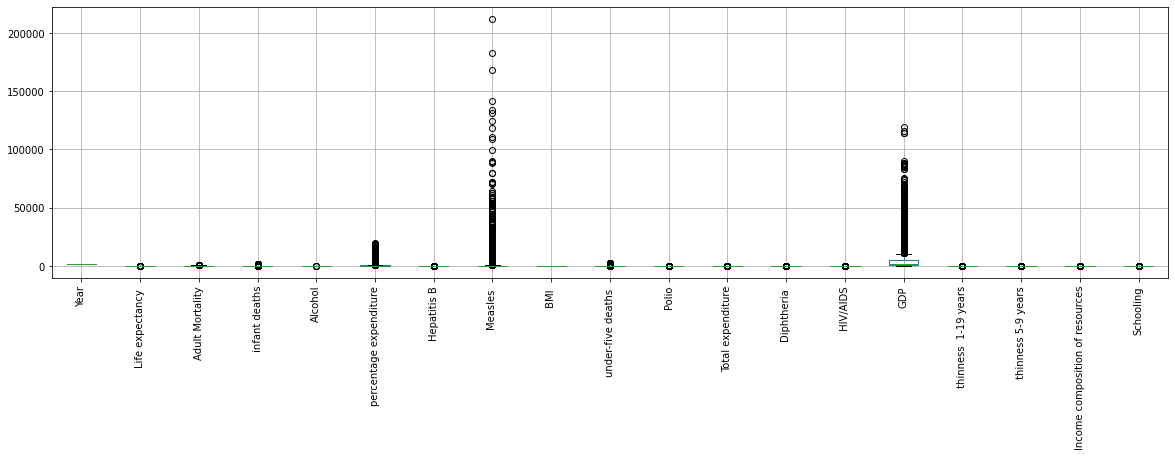

In [21]:
plt.figure(figsize = (20,5))
df_1.boxplot()
plt.xticks(rotation = 90)
plt.show()

In [22]:
df_new = df.drop(['Country','Year','Status'], axis = 1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

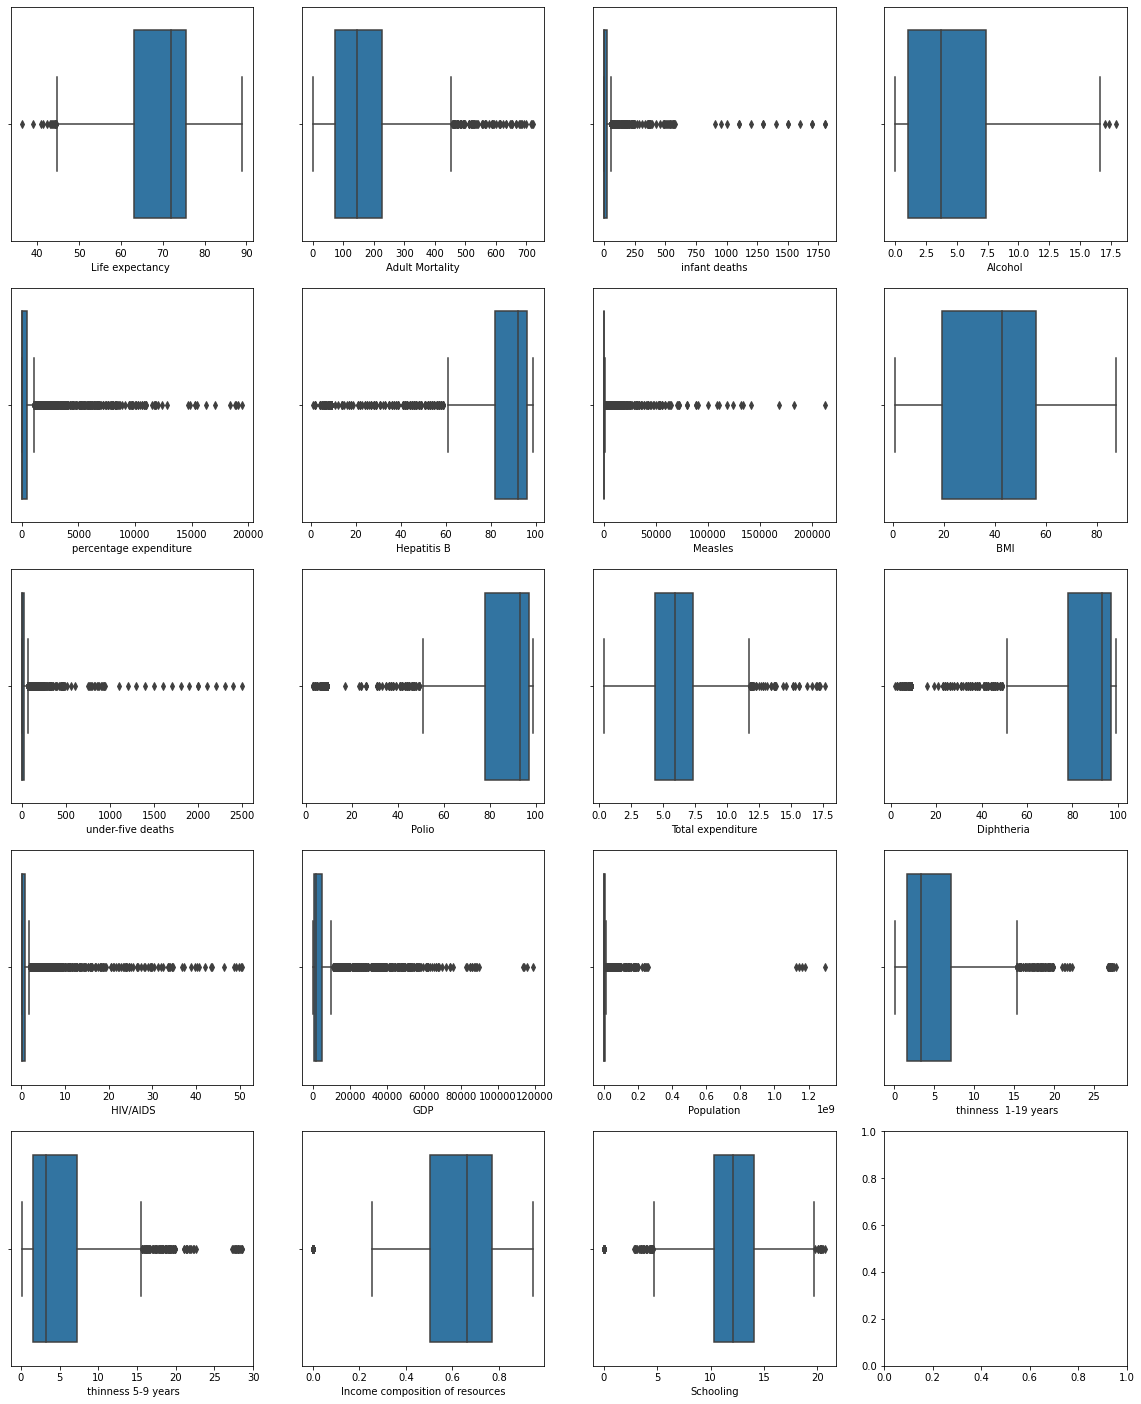

In [23]:
fig,ax = plt.subplots(nrows = 5, ncols = 4, figsize = (20,25))

for variable, subplot in zip(df_new.columns, ax.flatten()):
    sns.boxplot(df_new[variable], ax = subplot)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

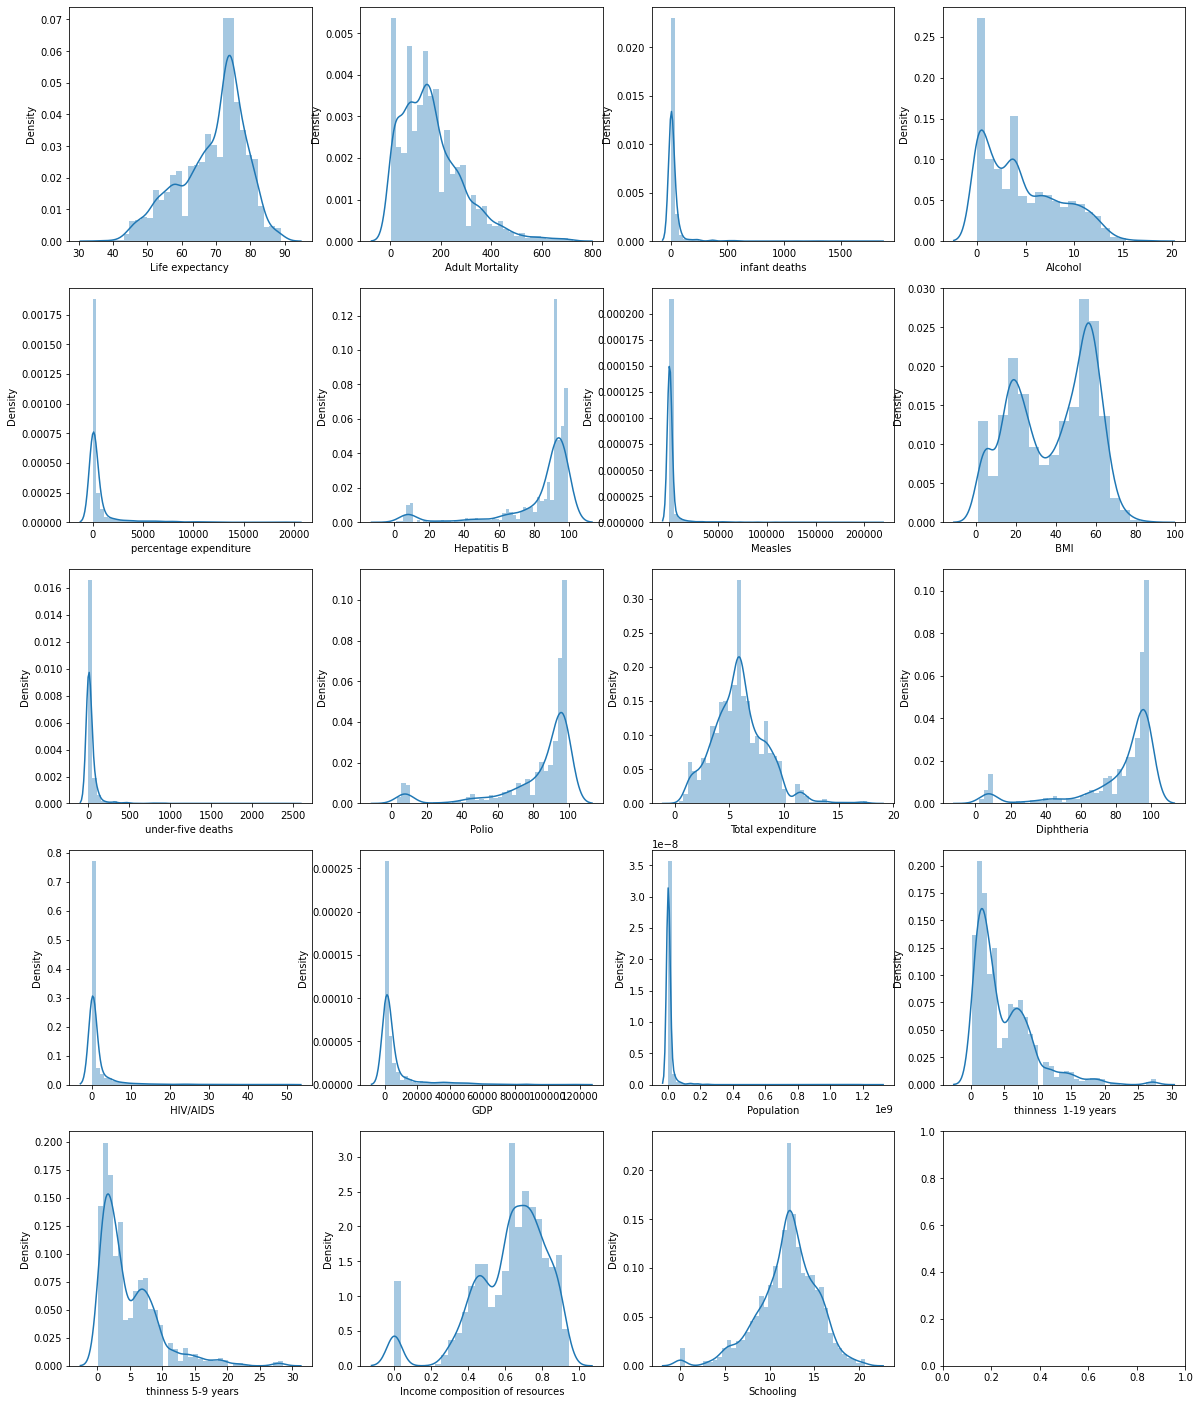

In [24]:
fig,ax = plt.subplots(nrows = 5, ncols = 4, figsize = (20,25))

for variable, subplot in zip(df_new.columns, ax.flatten()):
    sns.distplot(df_new[variable], ax = subplot)
plt.show()

We can see that the points ahead and after wiskers show presence of outliers. Each data point contributes a small volume of area to the total distribution.The distribution of the graph represents the distribution of outlier.

In [134]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
ll = q1 - (1.5 * iqr)
ul = q3 + (1.5 * iqr)

In [135]:
df2 = df[~((df < ll) |(df > ul)).any(axis =1)]
df2.shape

(1058, 22)

Outliers tell us that the observations of the given data set or how the data points differ significantly from the overall perspective. This would be an error during data collection but in this case its just the way our data is, in that case treating outliers would mean losing data from our dataset.

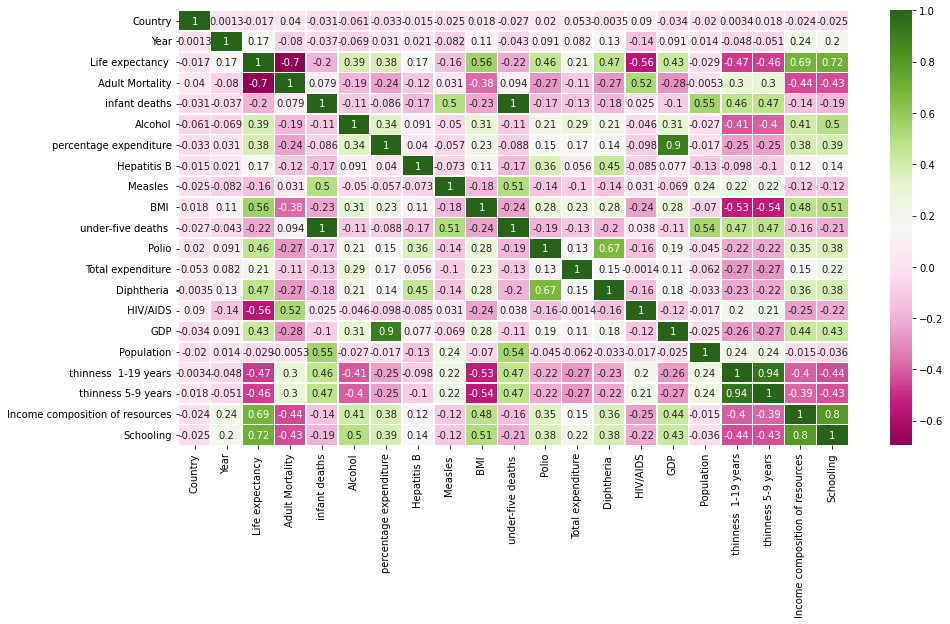

In [136]:
Corr=df.corr()
plt.subplots(figsize=(15,8))
sns.heatmap(Corr,annot=True,linewidth=0.5,cmap='PiYG')

Observing the correlation heatmap we can see that

Life expectancy is positively correlated with  income composition of resources, GDP, schooling, diphtheria, polio, BMI and percentage spending.


Life expectancy is negatively correlated with Adult_mortality, Thinness_1-19_years, Thinness_5-9_years, HIV / AIDS, Under_five_deaths, and Infant_deaths.


infant deaths is positively correlated with under-five deaths


adult mortality is negatively correlated with life expectancy, income compositions of resources, schooling and positively correlated with HIV/AIDS


GDP is positively correlated with percentage expenditure

Diphtheria is positively correlated with polio 


**Encoding**

categorical features need to be converted into numerical ones in machine learning

In [137]:
df.dtypes

Country                              int64
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [138]:
df['Status'].value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

The feature 'Status' has two categories viz.,'Developing' and 'Developed' which need one hot encoding

**one hot encoding**

In [139]:
df1 = pd.get_dummies(df)

First the Status of the country is turned into numberical with the get_dummies function, so we get 2 new columns with the original column  being dropped. 

In [140]:
df1

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
0,0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,0,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,0,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,0,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,0,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,0,1
2934,192,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,0,1
2935,192,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,0,1
2936,192,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,0,1


In [141]:
df1['Country'].nunique()

193

In [142]:
df1['Country'].value_counts()

191    16
120    16
144    16
140    16
138    16
       ..
124     1
128     1
38      1
49      1
117     1
Name: Country, Length: 193, dtype: int64

The feature country need label encoding as this is having more than two categories

**Label encoding**

In [143]:
from sklearn.preprocessing import LabelEncoder
df1['Country'] = LabelEncoder().fit_transform(data['Country'])
df1

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
0,0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,0,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,0,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,0,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,0,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,0,1
2934,192,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,0,1
2935,192,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,0,1
2936,192,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,0,1


In [144]:
df1.columns

Index(['Country', 'Year', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Status_Developed',
       'Status_Developing'],
      dtype='object')

In [145]:
y = df1['Life expectancy ']                # Defining target feature
X = df1.drop('Life expectancy ', axis=1)   # Defining input features

In [146]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42, test_size=0.2)

from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
print("MSE is: ", mean_squared_error(y_test, predictions))
print("R Squared is: ", r2_score(y_test, predictions))

MSE is:  15.004705369872193
R Squared is:  0.8268060551603276


So here the value of MSE is 15.004 and R Squared is 0.826.We can check if scaling has any effect on improving these parameters. We can go for any type nad here minmax scaling is used

**Min Max Scaling**

In [147]:
X = df1.drop('Life expectancy ', axis=1)

In [148]:
X.describe()

,Country,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,95.096324,2007.518720,164.725664,30.303948,4.546875,738.251295,83.022124,2419.592240,38.321247,42.035739,82.617767,5.938190,82.393125,1.742103,6611.523863,1.023085e+07,4.821886,4.852144,0.627551,11.992793,0.174268,0.825732
std,56.244904,4.613841,124.086215,117.926501,3.921946,1987.914858,22.996984,11467.272489,19.927677,160.445548,23.367166,2.400274,23.655562,5.077785,13296.603449,5.402242e+07,4.397621,4.485854,0.204820,3.264381,0.379405,0.379405
min,0.000000,2000.000000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,2004.000000,74.000000,0.000000,1.092500,4.685343,82.000000,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000,0.000000,1.000000
50%,93.000000,2008.000000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.000000,4.000000,93.000000,5.938190,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.662000,12.100000,0.000000,1.000000
75%,145.000000,2012.000000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000,0.000000,1.000000
max,192.000000,2015.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000,1.000000,1.000000


In [149]:
from sklearn import preprocessing
Min_Max = preprocessing.MinMaxScaler(feature_range=(0,1))
X = Min_Max.fit_transform(X)

In [150]:
X = pd.DataFrame(X)
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,0.495293,0.501248,0.226767,0.016836,0.254024,0.037898,0.836960,0.011403,0.432459,0.016814,0.829352,0.323168,0.828795,0.032517,0.055465,0.007907,0.171083,0.166742,0.661974,0.579362,0.174268,0.825732
std,0.292942,0.307589,0.171865,0.065515,0.219594,0.102049,0.234663,0.054044,0.230912,0.064178,0.243408,0.139308,0.243872,0.100550,0.111576,0.041753,0.159334,0.157398,0.216055,0.157700,0.379405,0.379405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.239583,0.266667,0.101108,0.000000,0.060610,0.000241,0.826531,0.000000,0.213210,0.000000,0.781250,0.232153,0.783505,0.000000,0.004857,0.000324,0.054348,0.052632,0.531909,0.497585,0.000000,1.000000
50%,0.484375,0.533333,0.198061,0.001667,0.209686,0.003332,0.928571,0.000080,0.486674,0.001600,0.937500,0.323168,0.938144,0.000000,0.014813,0.001072,0.115942,0.112281,0.698312,0.584541,0.000000,1.000000
75%,0.755208,0.800000,0.313019,0.012222,0.413214,0.022666,0.969388,0.001698,0.638470,0.011200,0.979167,0.403947,0.979381,0.013861,0.040091,0.003543,0.253623,0.249123,0.814346,0.681159,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [151]:
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42, test_size=0.2)
lr = linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)
print("MSE is: ", mean_squared_error(y_test, predictions))
print("R Squared is: ", r2_score(y_test, predictions))

MSE is:  15.004705369876302
R Squared is:  0.82680605516028


Next we can try normalization

**Normalization**

In [152]:
X = data.drop('Life expectancy ', axis=1)

In [153]:
X.describe()

,Country,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,95.096324,2007.518720,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,56.244904,4.613841,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,0.000000,2000.000000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,46.000000,2004.000000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,93.000000,2008.000000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,145.000000,2012.000000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,192.000000,2015.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [154]:
y = df1['Life expectancy ']               
X = df1.drop('Life expectancy ', axis=1)  

In [155]:
X = preprocessing.normalize(X)
X = pd.DataFrame(X)
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
count,2938.000000,2938.000000,2.938000e+03,2938.000000,2.938000e+03,2.938000e+03,2.938000e+03,2938.000000,2.938000e+03,2938.000000,2.938000e+03,2.938000e+03,2.938000e+03,2.938000e+03,2.938000e+03,2938.000000,2.938000e+03,2.938000e+03,2.938000e+03,2938.000000,2938.000000,2.938000e+03
mean,0.001176,0.023766,1.595158e-03,0.000073,4.902992e-05,4.703386e-03,9.954373e-04,0.007870,4.630850e-04,0.000102,1.015103e-03,7.456387e-05,1.014645e-03,1.519196e-05,4.056688e-02,0.974044,6.808549e-05,6.859236e-05,7.554512e-06,0.000145,0.000002,1.016453e-05
std,0.005192,0.092416,7.171165e-03,0.000731,2.580000e-04,1.960684e-02,4.111800e-03,0.061411,1.984357e-03,0.001072,4.174092e-03,3.168684e-04,4.184434e-03,3.122211e-04,1.420769e-01,0.126229,4.401512e-04,4.441704e-04,3.076481e-05,0.000574,0.000017,4.319630e-05
min,0.000000,0.000002,1.647078e-08,0.000000,5.389492e-11,0.000000e+00,5.086120e-09,0.000000,1.063981e-08,0.000000,3.098828e-08,3.585714e-09,4.508747e-08,1.545763e-10,6.801655e-08,0.004977,5.422949e-09,4.648242e-09,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,0.000012,0.000438,1.981941e-05,0.000000,2.326670e-07,7.004108e-07,1.467387e-05,0.000000,5.946069e-06,0.000000,1.429421e-05,1.326744e-06,1.404013e-05,6.169489e-08,2.452562e-04,0.999875,5.682543e-07,5.430484e-07,1.033531e-07,0.000002,0.000000,4.434891e-08
50%,0.000057,0.001448,9.687156e-05,0.000001,1.902428e-06,4.142580e-05,6.635199e-05,0.000009,2.502188e-05,0.000002,6.707280e-05,3.988151e-06,6.692698e-05,1.444326e-07,1.274353e-03,0.999996,2.626959e-06,2.613182e-06,4.526007e-07,0.000009,0.000000,7.207852e-07
75%,0.000207,0.004794,3.198317e-04,0.000013,8.969129e-06,7.077180e-04,1.943348e-04,0.000211,8.685918e-05,0.000016,1.952232e-04,1.525254e-05,1.896623e-04,1.564941e-06,9.026341e-03,0.999999,8.209352e-06,8.311898e-06,1.303994e-06,0.000030,0.000000,1.340785e-06
max,0.070766,0.979315,1.878640e-01,0.022071,6.236459e-03,2.490805e-01,4.781905e-02,0.998908,2.949249e-02,0.033540,4.781905e-02,4.370679e-03,4.781905e-02,1.597004e-02,9.931982e-01,1.000000,7.141733e-03,7.190316e-03,3.508611e-04,0.006312,0.000462,4.879495e-04


In [156]:
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42, test_size=0.2)
lr = linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)
print("MSE is: ", mean_squared_error(y_test, predictions))
print("R Squared is: ", r2_score(y_test, predictions))

MSE is:  83.18134120574484
R Squared is:  0.0398675438569801


Observing the min max scaing and normalization, it is clear that normalization does not fit for our modelbecause MSE has increased and r2 has decreased here.So the performance after min max scaling is better eith r2 value around 0.826 but MSE is around 15



#**3.Exploratory** **Data Analysis**

In [157]:
data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Life Expectancy Data.csv')

In [158]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [159]:
data.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

**Univariate and Bivariate Analyses**

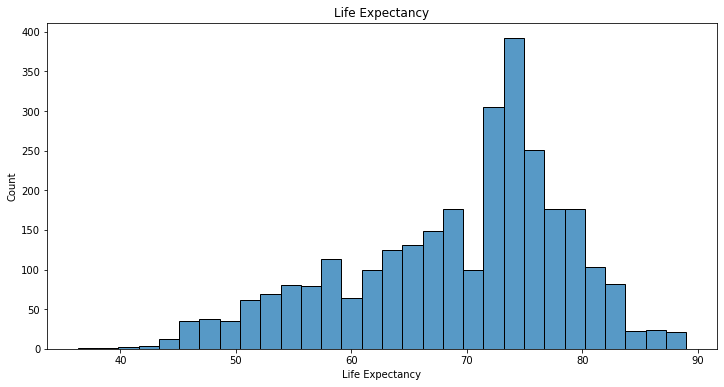

In [160]:
plt.figure(figsize=(12, 6))   
plt.title('Life Expectancy')
plt.ylabel('Count')
plt.xlabel('Life Expectancy')

sns.histplot(x=data['Life expectancy ']);


Most of the countries show life expectecy above 60

In [161]:
status_counts = data['Status'].value_counts()
status_counts

Developing    2426
Developed      512
Name: Status, dtype: int64

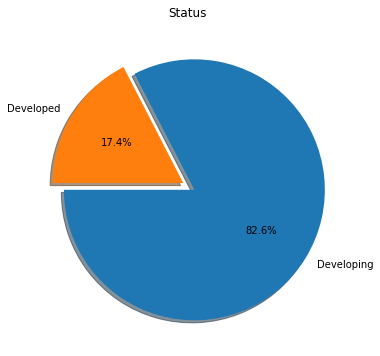

In [162]:
plt.figure(figsize=(12,6))
plt.title('Status')
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=180,explode=(0.06, 0.04),shadow=True);

17.4% countries are classified as developed and 82.6% countries are classified as developing

In [163]:
data['Country'].nunique()    # number of countries in the dataset

193

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


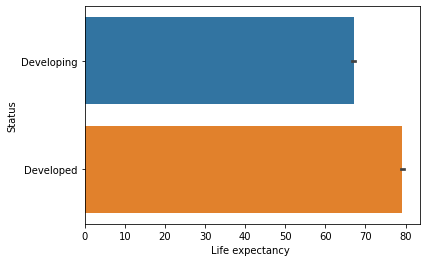

In [164]:
sns.barplot(data['Life expectancy '], data['Status'])
plt.show()

Plotting top 10 countries with highest life expectencies

In [165]:
life_expectancy_country_df = data.groupby('Country')[data.columns].mean()
life_expectancy_country_df.drop(columns=['Year'], inplace=True)
life_expectancy_country_df.reset_index(inplace=True)
life_expectancy_country_df

,Country,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250
1,Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750
2,Algeria,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,4.604000,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250
3,Angola,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,3.919333,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375
4,Antigua and Barbuda,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.9375,4.791333,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Venezuela (Bolivarian Republic of),73.38750,163.0000,9.3750,7.420000,0.000000,66.250000,165.0000,54.48750,10.7500,74.6875,4.998667,68.5000,0.10000,NaN,NaN,1.65000,1.56250,0.726812,12.78750
189,Viet Nam,74.77500,126.5625,29.1875,3.087333,0.000000,87.538462,4232.9375,11.18750,36.5000,94.9375,5.977333,91.7500,0.14375,NaN,NaN,14.92500,15.62500,0.627063,11.51250
190,Yemen,63.86250,211.8125,39.3750,0.047333,0.000000,55.687500,2761.1875,33.48750,51.6250,67.1250,5.005333,72.6250,0.10000,NaN,NaN,13.83125,13.75000,0.475500,8.50625
191,Zambia,53.90625,354.3125,33.4375,2.239333,89.650407,69.818182,6563.8125,17.45000,52.3750,64.3750,5.824000,74.2500,11.93125,811.811841,6.260246e+06,6.88125,6.76250,0.498437,11.21250


In [166]:
country_status_df = data.groupby('Country')['Status'].min()
country_status_df = country_status_df.reset_index()
country_status_df

,Country,Status
0,Afghanistan,Developing
1,Albania,Developing
2,Algeria,Developing
3,Angola,Developing
4,Antigua and Barbuda,Developing
...,...,...
188,Venezuela (Bolivarian Republic of),Developing
189,Viet Nam,Developing
190,Yemen,Developing
191,Zambia,Developing


In [167]:
life_expectancy_country_df = life_expectancy_country_df.merge(country_status_df, on='Country')
life_expectancy_country_df

,Country,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status
0,Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250,Developing
1,Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750,Developing
2,Algeria,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,4.604000,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250,Developing
3,Angola,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,3.919333,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375,Developing
4,Antigua and Barbuda,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.9375,4.791333,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375,Developing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Venezuela (Bolivarian Republic of),73.38750,163.0000,9.3750,7.420000,0.000000,66.250000,165.0000,54.48750,10.7500,74.6875,4.998667,68.5000,0.10000,NaN,NaN,1.65000,1.56250,0.726812,12.78750,Developing
189,Viet Nam,74.77500,126.5625,29.1875,3.087333,0.000000,87.538462,4232.9375,11.18750,36.5000,94.9375,5.977333,91.7500,0.14375,NaN,NaN,14.92500,15.62500,0.627063,11.51250,Developing
190,Yemen,63.86250,211.8125,39.3750,0.047333,0.000000,55.687500,2761.1875,33.48750,51.6250,67.1250,5.005333,72.6250,0.10000,NaN,NaN,13.83125,13.75000,0.475500,8.50625,Developing
191,Zambia,53.90625,354.3125,33.4375,2.239333,89.650407,69.818182,6563.8125,17.45000,52.3750,64.3750,5.824000,74.2500,11.93125,811.811841,6.260246e+06,6.88125,6.76250,0.498437,11.21250,Developing


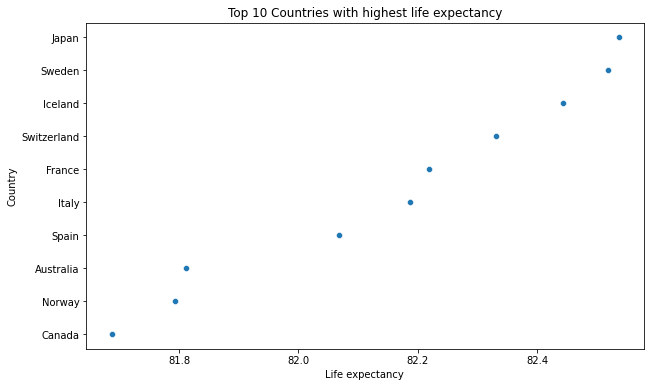

In [168]:
top_countries_df = life_expectancy_country_df.sort_values(by=['Life expectancy '], ascending=False).head(10)
plt.figure(figsize=(10,6))
# plt.xticks(rotation=75)
plt.title('Top 10 Countries with highest life expectancy')
sns.scatterplot(x=top_countries_df['Life expectancy '], y=top_countries_df['Country']);

Again,we can analyze the significances of  Hepatitis B, Polio and Diphtheria immunization coverage to life expectancy?

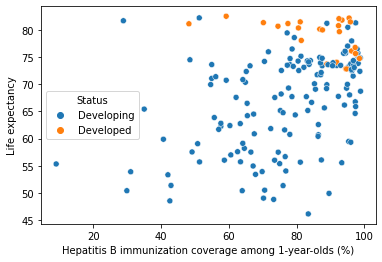

In [169]:
sns.scatterplot(x='Hepatitis B', y='Life expectancy ', hue='Status', data=life_expectancy_country_df)
plt.xlabel("Hepatitis B immunization coverage among 1-year-olds (%)");
plt.ylabel("Life expectancy");

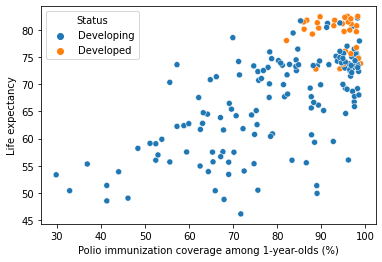

In [170]:
sns.scatterplot(x='Polio', y='Life expectancy ', hue='Status', data=life_expectancy_country_df)
plt.xlabel("Polio immunization coverage among 1-year-olds (%)");
plt.ylabel("Life expectancy");

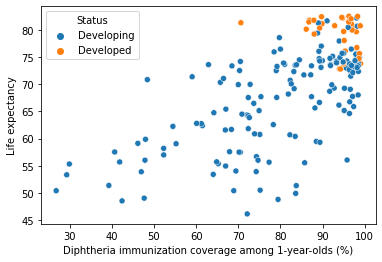

In [171]:
sns.scatterplot(x='Diphtheria ', y='Life expectancy ', hue='Status', data=life_expectancy_country_df)
plt.xlabel("Diphtheria immunization coverage among 1-year-olds (%)");
plt.ylabel("Life expectancy");

In general we can infer that high hepatitis B, polio and diphtheria immunization coverage contributes to high life expectancy,with a very few exceptions.

Now,we can find out countries with highest life expectancy in each year

In [172]:
life_expectancy_year_highest_df = data.loc[data.groupby('Year')['Life expectancy '].idxmax()]
life_expectancy_year_highest_simple_df = life_expectancy_year_highest_df[['Year', 'Country', 'Life expectancy ']]
life_expectancy_year_highest_simple_df.set_index('Year')

,Country,Life expectancy
Year,,
2000,Japan,81.1
2001,Switzerland,82.0
2002,Iceland,84.0
2003,Iceland,87.0
2004,Italy,89.0
2005,Italy,88.0
2006,Spain,88.0
2007,France,89.0
2008,France,89.0


Here, we have grouped our data frame by year and found out the indices with highest life expectancy.



#**4.Modeling**

In [173]:
# Function to apply Regression algorithms and return the results of models

# libraries for ML Models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# libraries for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error

def predictive_models():
    algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
                  RandomForestRegressor(n_estimators = 100, random_state = 0)]
    
    algorithm_names = ["Linear Regression","SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]
    
    # Errors for training data
    Mean_Squared_Error_Training = []
    Mean_Absolute_Error_Training = []
    Accuracy_Training = []
    
    # Errors for testing data
    Mean_Squared_Error_Testing = []
    Mean_Absolute_Error_Testing = []
    Accuracy_Testing = []
    
    # Regression models
    for i in algorithms:
        model = i
        model.fit(X_train,y_train)
    
        y_test_predict = model.predict(X_test)
        y_train_predict = model.predict(X_train)
            
        mse_1 = round(mean_squared_error(y_train, y_train_predict),4)
        mae_1 = round(mean_absolute_error(y_train, y_train_predict),4)
        
        mse_2 = round(mean_squared_error(y_test, y_test_predict),4)
        mae_2 = round(mean_absolute_error(y_test, y_test_predict),4)
        
        # Appending the Errors into the list for training data
        Mean_Squared_Error_Training.append(mse_1)
        Mean_Absolute_Error_Training.append(mae_1)
                
        # Appending the Errors into the list for training data
        Mean_Squared_Error_Testing.append(mse_2)
        Mean_Absolute_Error_Testing.append(mae_2)
        
    # Creating DataFrame for Logs of Models and their errors    
    results = pd.DataFrame({"Models":algorithm_names,
                            "Mean Squared Error Training":Mean_Squared_Error_Training,
                            "Mean Absolute Error Training":Mean_Absolute_Error_Training,      
                            "Mean Squared Error Testing":Mean_Squared_Error_Testing,
                            "Mean Absolute Error Testing":Mean_Absolute_Error_Testing})

    return results

In [174]:
results = predictive_models()
results

,Models,Mean Squared Error Training,Mean Absolute Error Training,Mean Squared Error Testing,Mean Absolute Error Testing
0,Linear Regression,84.2899,7.4579,83.1813,7.4227
1,SVR,94.9235,7.3320,91.9508,7.2864
2,KNeighbors Regressor,28.8413,3.7817,42.4141,4.5533
3,Decision-Tree Regressor,0.0000,0.0000,15.4570,2.4544
4,Random-Forest Regressor,1.3728,0.7747,7.4058,1.8161


As per the results Linear Regression and SVR performed good scores but KNeighbors Regressor, Decision-Tree Regressor and Random-Forest Regressor not for good modeling in Life Expectancy (WHO) dataset.

In [175]:
# Feacture Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [176]:
def predictive_models():
    algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(), 
                  RandomForestRegressor(n_estimators = 100, random_state = 0)]
    
    algorithm_names = ["Linear Regression","SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]
    
    # Errors for training data
    Mean_Squared_Error_Training = []
    Mean_Absolute_Error_Training = []
    Accuracy_Training = []
    
    # Errors for testing data
    Mean_Squared_Error_Testing = []
    Mean_Absolute_Error_Testing = []
    Accuracy_Testing = []
    
    # Regression models
    for i in algorithms:
        model = i
        model.fit(X_train,y_train)
    
        y_test_predict = model.predict(X_test)
        y_train_predict = model.predict(X_train)
            
        mse_1 = round(mean_squared_error(y_train, y_train_predict),4)
        mae_1 = round(mean_absolute_error(y_train, y_train_predict),4)
        
        mse_2 = round(mean_squared_error(y_test, y_test_predict),4)
        mae_2 = round(mean_absolute_error(y_test, y_test_predict),4)
        
        # Appending the Errors into the list for training data
        Mean_Squared_Error_Training.append(mse_1)
        Mean_Absolute_Error_Training.append(mae_1)
                
        # Appending the Errors into the list for training data
        Mean_Squared_Error_Testing.append(mse_2)
        Mean_Absolute_Error_Testing.append(mae_2)
        
    # Creating DataFrame for Logs of Models and their errors    
    after_scale_results = pd.DataFrame({"Models":algorithm_names,
                            "Mean Squared Error Training":Mean_Squared_Error_Training,
                            "Mean Absolute Error Training":Mean_Absolute_Error_Training,      
                            "Mean Squared Error Testing":Mean_Squared_Error_Testing,
                            "Mean Absolute Error Testing":Mean_Absolute_Error_Testing})

    return after_scale_results

In [177]:
# After feature scaling
after_scale_results = predictive_models()
after_scale_results

,Models,Mean Squared Error Training,Mean Absolute Error Training,Mean Squared Error Testing,Mean Absolute Error Testing
0,Linear Regression,84.2899,7.4579,83.1813,7.4227
1,SVR,85.2979,6.8467,83.9750,6.8788
2,KNeighbors Regressor,10.1883,2.1372,16.6600,2.6254
3,Decision-Tree Regressor,0.0000,0.0000,12.6594,2.2868
4,Random-Forest Regressor,1.1674,0.7223,5.5471,1.6303


As you can see after the sacling the models score decreased. so it is better to keep the best value before scaling.

#**5. Model Fine Tuning**

In [178]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}
rfr = RandomForestRegressor(random_state = 1)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 
                           cv = 5, n_jobs = -1, verbose = 0, return_train_score=True)
grid_search.fit(X_train, y_train);
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 88.99 %
Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 15}


In [179]:
param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}
rfr = RandomForestRegressor(random_state = 1)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 
                           cv = 5, n_jobs = -1, verbose = 0, return_train_score=True)
grid_search.fit(X_train, y_train);
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 88.99 %
Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 15}
